In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Load datasets

%matplotlib inline

training_df = pd.read_csv('data/credit-data-training.csv' )

# Show df to get an idea of the data
training_df.head(10)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
5,Creditworthy,Some Balance,6,No Problems (in this bank),Home Related,362,< £100,< 1yr,4,None,NaN,3,52.0,Other Banks/Depts,2,More than 1,1,1,1,1
6,Non-Creditworthy,No Account,6,Some Problems,Home Related,433,£100-£1000,< 1yr,4,None,NaN,2,24.0,Other Banks/Depts,1,1,1,2,1,1
7,Creditworthy,No Account,6,Paid Up,Home Related,454,None,< 1yr,3,None,NaN,2,22.0,Other Banks/Depts,2,1,1,1,1,1
8,Creditworthy,No Account,6,Paid Up,Home Related,484,None,1-4 yrs,3,Yes,3.0,1,28.0,Other Banks/Depts,2,1,1,1,1,1
9,Creditworthy,Some Balance,6,Paid Up,Home Related,660,£100-£1000,1-4 yrs,2,None,4.0,1,23.0,Other Banks/Depts,1,1,1,1,1,1


## Exploring the training dataset

In [3]:
training_df = training_df.drop_duplicates()
training_df.shape

(500, 20)

In [4]:
# nulls = []
nulls = training_df.isnull().sum(axis = 0).reset_index()
nulls.columns = ['column name', '#nulls']
# nulls

In [5]:
# Showing number of distinct values per column - for detecting low variability columns
distinc_values = training_df.nunique(axis=0).reset_index()
distinc_values.columns = ['column name', '#distinct values']
# distinc_values

In [6]:
training_clean = training_df
training_clean = training_clean.drop(['Concurrent-Credits', 'Occupation', 'Duration-in-Current-address', 'Telephone', 'Foreign-Worker', 'No-of-dependents', 'Guarantors'], axis=1)
# [['Credit-Application-Result', 'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit', 'Purpose', 'Credit-Amount', 'Value-Savings-Stocks', 'Length-of-current-employment', ]]

training_clean['Credit-Application-Result'] = training_clean['Credit-Application-Result'].apply(lambda x: 1 if (x=='Creditworthy') else 0)

fill_mean = lambda col:col.fillna(col.mean())
training_clean['Age-years'] = training_clean['Age-years'].fillna(training_clean['Age-years'].median())
training_clean.isnull().sum(axis = 0).reset_index()


initial_columns = training_clean.columns

training_clean['Age-years'].mean()


35.574

In [7]:
training_clean.skew()

Credit-Application-Result       -0.960891
Duration-of-Credit-Month         0.991000
Credit-Amount                    2.108522
Instalment-per-cent             -0.596533
Most-valuable-available-asset    0.013780
Age-years                        1.102038
Type-of-apartment               -0.056348
dtype: float64

In [8]:
# ax = training_clean['Credit-Amount'].plot.hist(bins=100, alpha=0.9)
# ax.set_xlabel("Credit Amount")
# ax.set_ylabel("Individuals")

In [9]:
# ax = sns.heatmap(training_clean.corr(), annot=True, fmt=".2f")

In [10]:
training_clean = pd.get_dummies(training_clean)
# training_clean = training_clean.drop(['Purpose_Other'], axis=1)
training_clean 

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),...,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,4,1494,1,1,33.0,2,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,1,4,1494,1,1,29.0,2,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,1,4,1544,2,1,42.0,2,0,1,1,...,0,0,0,1,0,1,0,0,0,1
3,1,4,3380,1,1,37.0,2,0,1,1,...,0,0,0,1,0,1,0,0,1,0
4,1,6,343,4,1,27.0,2,1,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,60,7418,1,1,33.0,2,1,0,1,...,1,0,0,0,1,0,0,1,1,0
496,1,60,7418,1,1,27.0,2,1,0,1,...,0,0,0,0,1,0,0,1,1,0
497,1,60,9157,2,4,27.0,3,1,0,1,...,0,0,0,0,1,0,0,1,1,0
498,1,60,13756,2,4,63.0,3,0,1,1,...,0,0,0,0,1,0,1,0,1,0


In [11]:
# # compute outliers
# column = 'Age-years'#'Total Sales'
# def col_outliers(df, col_name):
#     iq1, iq2, iq3 = df[col_name].quantile([0.25,0.5,0.75])
#     IQR = iq3 - iq1
#     uf = iq3 + 1.5 * IQR
#     lf = iq1 - 1.5 * IQR
#     print ("upper fence = {0}, lower fence {1} ".format(uf, lf) )
#     return df[(df[column]<lf) |(df[column]>uf)]

# outliers = col_outliers(training_clean, column)



In [12]:
# remove outliers
# training_clean= training_clean.drop(outliers.index) #[[:,:]]
# training_clean.shape

In [13]:
# init_col_names_p_vals = init_col_names_p_vals.drop_duplicates(keep='first')
# init_col_names_p_vals[init_col_names_p_vals['p-value']<=0.05]

## 0. Prepare training and test data

In [14]:
from sklearn.model_selection import train_test_split

y_values = training_clean['Credit-Application-Result']
X_values = training_clean.drop(['Credit-Application-Result'], axis = 1 )

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.3, random_state=1)

# # training_set.shape
# X_train.shape
# y_train.shape
# X_test.shape
# y_test.shape
y_train.head()

13     1
61     1
298    1
39     1
360    0
Name: Credit-Application-Result, dtype: int64

In [15]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def del_training_test_columns (columns):
    new_X_train = X_train.drop(columns, axis = 1 )
    new_X_test = X_test.drop(columns, axis = 1 )
    return new_X_train, new_X_test, y_train, y_test

def print_report (y_test_m, y_predict ):
    
    matrix = confusion_matrix(y_test_m, y_predict)
    tn, fp, fn, tp = matrix.ravel()
    print("Confusion Matrix:")
    print(".---------------------------------------.")
    print("|\t \t  Predicted Values\t|")
    print("|\t \t  +\t|\t -\t|")
    print("|---------------------------------------|")
         
    print("|Actual\t + |\t{0}\t|\t{1}\t|".format(tp, fn))
    print("|Values\t - |\t{0}\t|\t{1}\t|".format(fp, tn))
    print("'---------------------------------------'")
    
    print ("PPV:"+str(tp/(tp+fp)))
    print ("NPV:"+str(tn/(tn+fn)))
    print ("Overall Accuracy:"+str((tp+tn)/(tn+fn+fp+tp)))
    
#     print("Accuracy per Class:")
#     print ("Positive:"+str(tp/(tp+fp)))
#     print ("Negative:"+str(tn/(tn+fp)))
           

    print("Classification Report")
    print(classification_report(y_test_m, y_predict))
    
    print("Accuracy: "+str(accuracy_score(y_test_m, y_predict, normalize= True)))
    print("Recall: "+str(recall_score(y_test_m, y_predict)))

    
def output_important_features(model, features):
    # get importance
    importance = model.feature_importances_
    plot_importance(importance, features)

def plot_importance(importances, features):
    for i,v in enumerate(importances):
        print('Feature {0}: {1}, Score: {2}'.format (i, features[i],v))
    
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [features[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(len(features)), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(len(features)), names, rotation=90)

    # Show plot
    plt.show()
    
def plot_roc(testX, testy, model, model_name ):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(testy))]
    
    # predict probabilities
    lr_probs = model.predict_proba(testX)
    
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    # calculate scores
    ns_auc = roc_auc_score(testy, ns_probs)
    lr_auc = roc_auc_score(testy, lr_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_name+': ROC AUC=%.3f' % (lr_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
    
    return ns_fpr, ns_tpr, lr_fpr, lr_tpr
    
#     # plot the roc curve for the model
#     pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
#     pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    
#     # axis labels
#     pyplot.xlabel('False Positive Rate')
#     pyplot.ylabel('True Positive Rate')
    
#     # show the legend
#     pyplot.legend()
#     # show the plot
#     pyplot.show()

# compute with formulas from the theory
def compute_rSq_adjRSq (model, X, y, yhat):
    yhat = model.predict(X)
    SS_Residual = sum((y-yhat)**2)       
    SS_Total = sum((y-np.mean(y))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return r_squared, adjusted_r_squared

def compute_abs_errors (test_labels, predictions):
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    return errors

def compute_mae(test_labels,predictions):
    # Calculate the absolute errors
    errors = compute_abs_errors (test_labels,predictions)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    return errors
    
def compute_accuracy(test_labels, predictions):
    # Calculate mean absolute percentage error (MAPE)
    errors = compute_abs_errors(test_labels, predictions)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    return accuracy

def classification_labels(df):
    new_labels = df['predictions'].apply(lambda x : 1 if (x >= 0.5) else 0)
    return new_labels



In [16]:
# compute p-values for each attribute in the training

def p_value_computation(col, y_vals):
    c , p = pearsonr(y_vals,  col)
    return p

def compute_all_pvals(training_set, y_vals):
    p_values= pd.DataFrame(columns=['column-name', 'p-value']) 
    for i in range(len(training_set.columns)):
        col_name = training_set.columns[i]
        pv = p_value_computation(y_vals, training_set[col_name])
        df = {'column-name': col_name, 'p-value': pv}
        p_values = p_values.append(df, ignore_index=True)
    return p_values
 
def compute_all_pvals_with_mean(training_set, y_vals):
    p_values = compute_all_pvals(training_set, y_vals)
    init_col_names_p_vals = pd.DataFrame(columns = p_values.columns)
    
    for idx_col in range(len(initial_columns)):
        col_name = initial_columns[idx_col]
        mean = mean_p_val_cateogrical(col_name,p_values)
        df = {'column-name': col_name, 'p-value': mean}
        init_col_names_p_vals = init_col_names_p_vals.append(df, ignore_index=True)
    return init_col_names_p_vals    
    
def mean_p_val_cateogrical(col, p_values):
    dummy_p_vals = pd.DataFrame(p_values[p_values['column-name'].str.match(col)])
    mean = dummy_p_vals['p-value'].mean()
    return mean

def find_significant_vars (dataset):
    training_set_columns = dataset[dataset['p-value']<0.05].reset_index()
    training_set_columns = training_set_columns.drop(['index'], axis = 1)
    return training_set_columns

def find_columns_starting_with (df, start):
    result = pd.DataFrame()
    cols = df.filter(regex='^'+start,axis=1)
    result = pd.concat([result, cols], axis=1, sort=False)
    return result

def build_set_with_significant_vars(old_train_set, training_set_columns):
    # building the clean training dataset (still containing outliers)
    training_set = pd.DataFrame()
    for i in range(len(training_set_columns)):
        col_name = str(training_set_columns['column-name'].iloc[i])
        cols = find_columns_starting_with(old_train_set, col_name)
        training_set = pd.concat([training_set, cols], axis=1, sort=False)
    return training_set

## 1. Logistic Regression

In [17]:
#reset this
p_vals_mean_sign = pd.DataFrame(columns=['column-name', 'p-value']) 
# result = stepwise_selection(X_train_lr, y_train_lr)

In [35]:
from sklearn.linear_model import LinearRegression, LogisticRegression

X_train_lr, X_test_lr, y_train_lr, y_test_lr = X_train, X_test, y_train, y_test
# del_training_test_columns([ ])

# X_train_lr = build_set_with_significant_vars(X_train_lr , p_vals_mean_sign)
# X_test_lr = build_set_with_significant_vars(X_test_lr, p_vals_mean_sign)

lr = LogisticRegression( max_iter=62).fit(X_train_lr, y_train_lr)
y_predict_lr = lr.predict(X_test_lr)
compute_mae(y_test_lr,y_predict_lr)

lr.score(X_test_lr, y_test_lr)
# lr.score(X_train_lr, y_train_lr)

Mean Absolute Error: 0.25 degrees.


/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7533333333333333

In [36]:
print_report(y_test_lr, y_predict_lr)

# get importance
# importance = lr.coef_[0]

# plot_importance (importance, X_train_lr.columns)

Confusion Matrix:
.---------------------------------------.
|	 	  Predicted Values	|
|	 	  +	|	 -	|
|---------------------------------------|
|Actual	 + |	93	|	10	|
|Values	 - |	27	|	20	|
'---------------------------------------'
PPV:0.775
NPV:0.6666666666666666
Overall Accuracy:0.7533333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        47
           1       0.78      0.90      0.83       103

    accuracy                           0.75       150
   macro avg       0.72      0.66      0.68       150
weighted avg       0.74      0.75      0.74       150

Accuracy: 0.7533333333333333
Recall: 0.9029126213592233


In [34]:
print ("All p-values")
all_pvals = compute_all_pvals(X_train_lr, y_train_lr)
# all_pvals

All p-values


In [26]:

print ("All p-values with mean for categorical data")
p_vals_mean = compute_all_pvals_with_mean(X_train_lr, y_train_lr)
# p_vals_mean
p_vals_mean_sign = find_significant_vars (p_vals_mean)
# p_vals_mean_sign



All p-values with mean for categorical data


## 2. Decision Tree Classification

In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-lea

X_train_dt, X_test_dt, y_train_dt, y_test_dt = del_training_test_columns([]) 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=13)

# Train Decision Tree Classifer
clf = clf.fit(X_train_dt,y_train_dt)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test_dt)
compute_mae(y_test_dt,y_pred_dt)
# compute_accuracy(y_test_dt,y_pred_dt)
clf.score(X_test_dt, y_test_dt)


Mean Absolute Error: 0.36 degrees.


0.64

Confusion Matrix:
.---------------------------------------.
|	 	  Predicted Values	|
|	 	  +	|	 -	|
|---------------------------------------|
|Actual	 + |	77	|	26	|
|Values	 - |	29	|	18	|
'---------------------------------------'
PPV:0.7264150943396226
NPV:0.4090909090909091
Overall Accuracy:0.6333333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.41      0.38      0.40        47
           1       0.73      0.75      0.74       103

    accuracy                           0.63       150
   macro avg       0.57      0.57      0.57       150
weighted avg       0.63      0.63      0.63       150

Accuracy: 0.6333333333333333
Recall: 0.7475728155339806
Feature 0: Duration-of-Credit-Month, Score: 0.13884713997163026
Feature 1: Credit-Amount, Score: 0.3172052654379119
Feature 2: Instalment-per-cent, Score: 0.06310840786798284
Feature 3: Most-valuable-available-asset, Score: 0.01680892081580453
Feature 4: Age-years, Score: 0.15799772

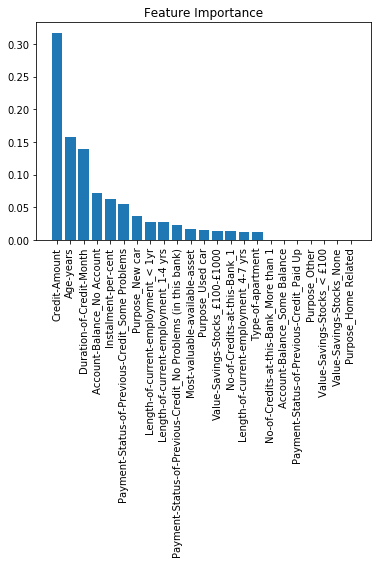

In [28]:
print_report(y_test_dt, y_pred_dt)
output_important_features (clf, X_train_dt.columns)

In [29]:
# print ("All p-values")
# all_pvals = compute_all_pvals(X_train_lr, y_train_lr)
# all_pvals

# print ("All p-values with mean for categorical data")
# p_vals_mean = compute_all_pvals_with_mean(X_train_dt, y_train_dt)

# p_vals_mean_sign = find_significant_vars (p_vals_mean)
# p_vals_mean_sign



## 3. Random Forest Model

In [38]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
 
X_train_rf, X_test_rf, y_train_rf, y_test_rf = del_training_test_columns([])
# f1 - score without 'Account-Balance_No Account', 'Account-Balance_Some Balance' is 0.69
# f1 - score without 'Most-valuable-available-asset' is 0.73
# f1 - score with all is 0.78

# max_score = 0
# seed_rf = RandomForestClassifier( n_estimators = 1000, random_state = 0)
# # Instantiate model with 1000 decision trees
# for seed in range(100):
#     seed_rf = RandomForestClassifier( n_estimators = 1000, random_state = seed)
#     seed_rf.fit(X_train_rf, y_train_rf) 
#     score = seed_rf.score(X_test_rf, y_test_rf)
#     if (max_score<score):
#         rf = seed_rf
#         max_score = score
#         max_seed = seed
#         print("Accuracy score (validation): {0:.3f}, seed = {1}".format(score, seed))

rf = RandomForestClassifier( n_estimators = 1000, random_state = 6)
# Train the model on training data
rf.fit(X_train_rf, y_train_rf)
y_predict_rf = rf.predict(X_test_rf)

compute_mae(y_test_rf,y_predict_rf)
rf.score(X_test_rf, y_test_rf)

Mean Absolute Error: 0.24 degrees.


0.76

Confusion Matrix:
.---------------------------------------.
|	 	  Predicted Values	|
|	 	  +	|	 -	|
|---------------------------------------|
|Actual	 + |	94	|	9	|
|Values	 - |	27	|	20	|
'---------------------------------------'
PPV:0.7768595041322314
NPV:0.6896551724137931
Overall Accuracy:0.76
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.43      0.53        47
           1       0.78      0.91      0.84       103

    accuracy                           0.76       150
   macro avg       0.73      0.67      0.68       150
weighted avg       0.75      0.76      0.74       150

Accuracy: 0.76
Recall: 0.912621359223301
Feature 0: Duration-of-Credit-Month, Score: 0.13755545639876807
Feature 1: Credit-Amount, Score: 0.19545519510477918
Feature 2: Instalment-per-cent, Score: 0.06083557585750887
Feature 3: Most-valuable-available-asset, Score: 0.06324489076151073
Feature 4: Age-years, Score: 0.14088309574461136
Feature 5: Type-of-

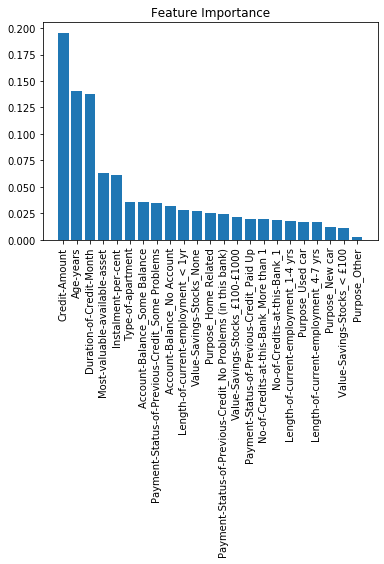

In [39]:
print_report(y_test_rf, y_predict_rf)
output_important_features (rf, X_train_rf.columns)

## 4. Boosting model

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

X_train_gb, X_test_gb, y_train_gb, y_test_gb = del_training_test_columns([])

gb_clf = GradientBoostingClassifier(n_estimators=20,  max_features=2, max_depth=5, random_state=42)
gb_clf.fit(X_train_gb, y_train_gb) 

y_predict_gb = gb_clf.predict(X_test_gb)

compute_mae(y_test_gb,y_predict_gb)
gb_clf.score(X_test_gb, y_test_gb)

Mean Absolute Error: 0.27 degrees.


0.7266666666666667

In [28]:
# lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# for learning_rate in lr_list:
#     gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=5, random_state=1)
#     gb_clf.fit(X_train_gb, y_train_gb) 
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_gb, y_train_gb)))
#     print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_gb, y_test_gb)))
    
#     print("Accuracy:",metrics.accuracy_score(y_test, y_predict_gb))

Confusion Matrix:
.---------------------------------------.
|	 	  Predicted Values	|
|	 	  +	|	 -	|
|---------------------------------------|
|Actual	 + |	93	|	10	|
|Values	 - |	31	|	16	|
'---------------------------------------'
PPV:0.75
NPV:0.6153846153846154
Overall Accuracy:0.7266666666666667
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.34      0.44        47
           1       0.75      0.90      0.82       103

    accuracy                           0.73       150
   macro avg       0.68      0.62      0.63       150
weighted avg       0.71      0.73      0.70       150

Accuracy: 0.7266666666666667
Recall: 0.9029126213592233
Feature 0: Duration-of-Credit-Month, Score: 0.12638375613435787
Feature 1: Credit-Amount, Score: 0.18670139546072212
Feature 2: Instalment-per-cent, Score: 0.05021313208436791
Feature 3: Most-valuable-available-asset, Score: 0.03878413966592242
Feature 4: Age-years, Score: 0.06853145074990516
Fea

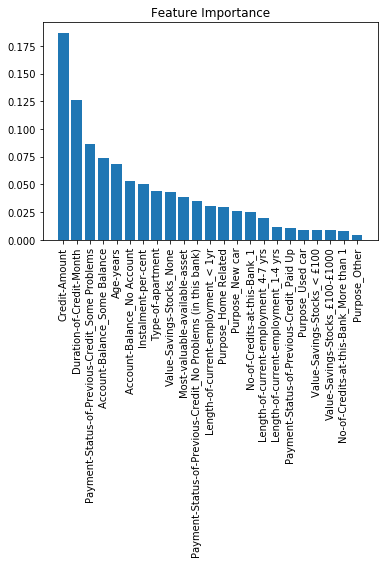

In [41]:
print_report(y_test_gb, y_predict_gb)
output_important_features (gb_clf, X_train_gb.columns)

# Plot ROC curve

In [47]:
ns_fpr, ns_tpr,b_fpr, b_tpr =plot_roc(X_test_gb, y_test_gb, gb_clf, 'Boosted Model')

No Skill: ROC AUC=0.500
Boosted Model: ROC AUC=0.743


In [48]:
ns_fpr, ns_tpr,rf_fpr, rf_tpr = plot_roc(X_test_rf, y_test_rf, rf, 'Random Forest Model')

No Skill: ROC AUC=0.500
Random Forest Model: ROC AUC=0.778


In [49]:
ns_fpr, ns_tpr, dt_fpr, dt_tpr =plot_roc(X_test_dt, y_test_dt, clf, 'Decision Tree Model')

No Skill: ROC AUC=0.500
Decision Tree Model: ROC AUC=0.583


In [50]:
ns_fpr, ns_tpr, lr_fpr, lr_tpr = plot_roc(X_test_lr, y_test_lr, lr, 'Logistic Regression Model')

No Skill: ROC AUC=0.500
Logistic Regression Model: ROC AUC=0.801


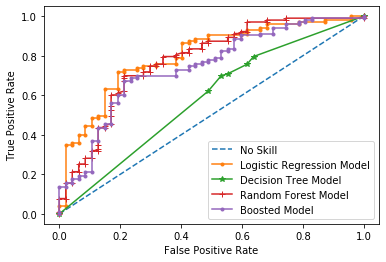

In [51]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression Model')
pyplot.plot(dt_fpr, dt_tpr, marker='*', label='Decision Tree Model')
pyplot.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest Model')
pyplot.plot(b_fpr, b_tpr, marker='.', label='Boosted Model')
    
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
    
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


# Prediction 

In [52]:
customers_df = pd.read_csv('data/customers-to-score.csv')
initial_columns_no_target = initial_columns.drop(['Credit-Application-Result'])
customers_df = customers_df[initial_columns_no_target]


In [55]:

customers_df = pd.get_dummies(customers_df)
customers_df['Purpose_Other'] = 0
customers_df.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,...,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1,Purpose_Other
0,9,2799,2,1,36,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,12,2122,3,1,39,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,24,3758,1,4,23,1,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
3,11,3905,2,1,36,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
4,6,1957,1,3,31,2,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [56]:
cred_worthy = rf.predict(customers_df)
# customers_df.columns

In [57]:
cred_worthy

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [58]:
# count element '1'
count =  np.count_nonzero(cred_worthy == 1)
count

452

In [317]:
count/customers_df.shape[0]


0.904

In [310]:
customers_df.shape[0]

500